<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220628_Health_Insurance_Premium_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/10/26/health-insurance-premium-prediction-with-machine-learning/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Ironhack/DBs/Health_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
import plotly.express as px

In [7]:
figure = px.histogram(data, x='sex', color='smoker', title='Number of smokers', text_auto=True)
figure.show()

In [8]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [9]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [10]:
data['sex'] = data['sex'].map({'female':0, 'male':1})
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [12]:
pie = data['region'].value_counts()
pie

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
regions = pie.index
regions

Index(['southeast', 'southwest', 'northwest', 'northeast'], dtype='object')

In [14]:
population = pie.values
population

array([364, 325, 325, 324])

In [15]:
fig = px.pie(data, values=population, names=regions)
fig.show()

In [16]:
print(data.corr())

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

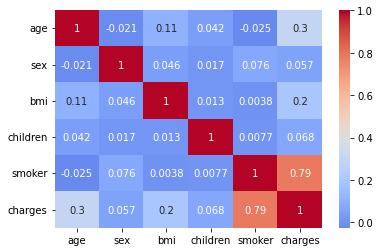

In [18]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, center=0.4)

In [19]:
x = np.array(data.drop(columns=['charges', 'region'], axis=1))
y = np.array(data.charges)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1070, 5), (268, 5), (1070,), (268,))

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
model = RandomForestRegressor()

In [24]:
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [25]:
ypred = model.predict(xtest)

In [26]:
data2 = pd.DataFrame(data={'Predicted Premium Amount': ypred})

In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Predicted Premium Amount  268 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [28]:
data2.head()

,Predicted Premium Amount
0,11173.978936
1,5071.116310
2,28302.658491
3,9658.510129
4,34530.559028
